In [1]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

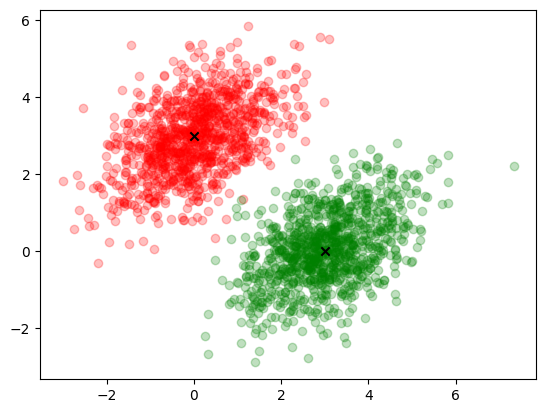

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(
    x=negative_samples[:, 0],
    y=negative_samples[:, 1],
    color='red',
    alpha=0.25)
plt.scatter(0, 3, color='black', marker='x')

plt.scatter(
    x=positive_samples[:, 0],
    y=positive_samples[:, 1],
    color='green',
    alpha=0.25)
plt.scatter(3, 0, color='black', marker='x')

In [3]:
import tensorflow as tf

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros(shape=(num_samples_per_class, 1), dtype=np.float32),
                     np.ones(shape=(num_samples_per_class, 1), dtype=np.float32)))

input_dim = 2  # coordinates x, y
output_dim = 1  # category (class: neg. or pos.)
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

2023-09-08 14:48:58.026856: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 14:48:59.378781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-08 14:48:59.397466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-

In [4]:
def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

def training_step(inputs, targets, lr=0.1):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * lr)
    b.assign_sub(grad_loss_wrt_b * lr)
    return loss

In [5]:
# warn: not epoch but step
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"step:{step}, loss:{loss:.4f}")

predictions = model(inputs)

step:0, loss:6.5313
step:1, loss:0.8867
step:2, loss:0.2497
step:3, loss:0.1650
step:4, loss:0.1459
step:5, loss:0.1353
step:6, loss:0.1263
step:7, loss:0.1181
step:8, loss:0.1106
step:9, loss:0.1038
step:10, loss:0.0975
step:11, loss:0.0916
step:12, loss:0.0863
step:13, loss:0.0814
step:14, loss:0.0769
step:15, loss:0.0728
step:16, loss:0.0690
step:17, loss:0.0655
step:18, loss:0.0622
step:19, loss:0.0593
step:20, loss:0.0566
step:21, loss:0.0541
step:22, loss:0.0518
step:23, loss:0.0497
step:24, loss:0.0478
step:25, loss:0.0460
step:26, loss:0.0444
step:27, loss:0.0429
step:28, loss:0.0415
step:29, loss:0.0402
step:30, loss:0.0390
step:31, loss:0.0380
step:32, loss:0.0370
step:33, loss:0.0361
step:34, loss:0.0353
step:35, loss:0.0345
step:36, loss:0.0338
step:37, loss:0.0331
step:38, loss:0.0326
step:39, loss:0.0320


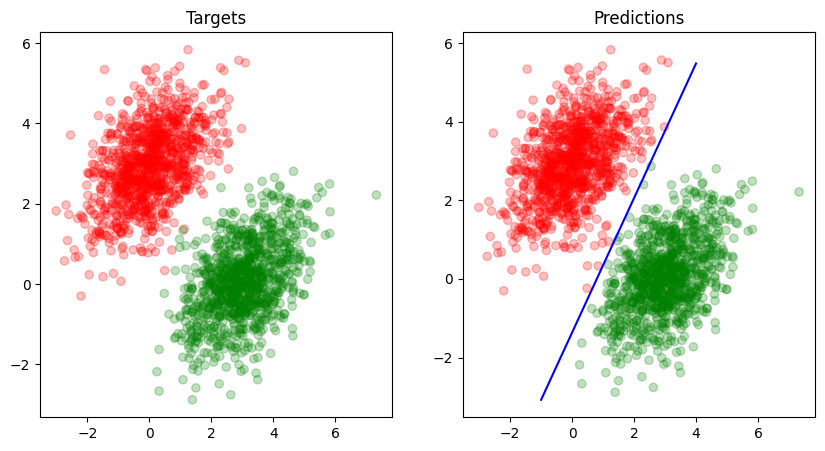

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].set_title('Targets')
axes[0].scatter(inputs[:, 0],
                inputs[:, 1],
                color=np.where(targets[:, 0] == 0, 'red', 'green'),
                alpha=0.25)

axes[1].set_title('Predictions')
axes[1].scatter(inputs[:, 0],
                inputs[:, 1],
                color=np.where(predictions[:, 0] <= 0.5, 'red', 'green'),
                alpha=0.25)

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-b')

_ = plt.show()